## Ali Alaryan
### Project 1

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve 
from scipy.optimize import minimize # for optimized parameter identification
from scipy.integrate import odeint # for ode integration

# reading data into 
data = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\mask-use-by-county.csv')
data

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


C:\Users\alial\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


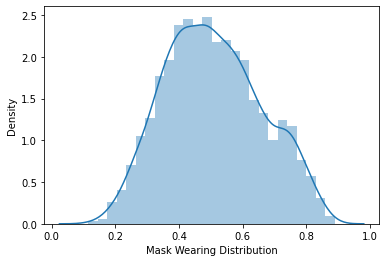

<Figure size 432x288 with 0 Axes>

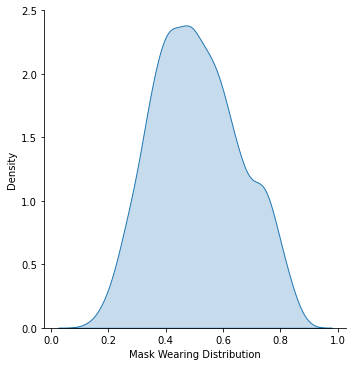

<Figure size 432x288 with 0 Axes>

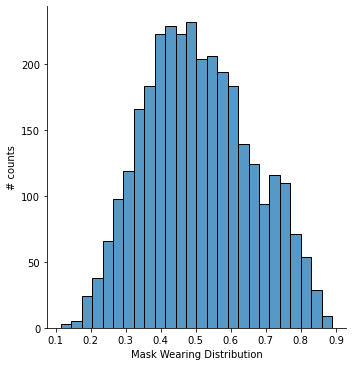

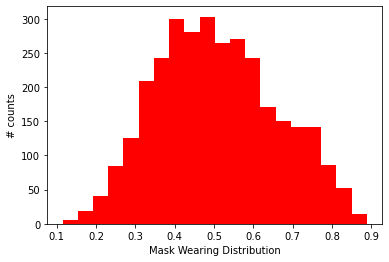

In [2]:
# to see behavior of the mask wearing

mask_always = data.iloc[:,5].values # always wearing
import seaborn as sns
plt.figure()
sns.distplot(mask_always)
plt.xlabel('Mask Wearing Distribution')
plt.ylabel('Density')

plt.figure()
sns.displot(mask_always,kind="kde",fill=True);
plt.xlabel('Mask Wearing Distribution')
plt.ylabel('Density')


plt.figure()
sns.displot(mask_always,kde=False,fill=True);
plt.xlabel('Mask Wearing Distribution')
plt.ylabel('# counts')

plt.figure()
plt.hist(mask_always,bins = 20,  color = "red");
plt.xlabel('Mask Wearing Distribution')
plt.ylabel('# counts')
plt.show()

In [3]:
# account always wearing mask is greater than 0.4 then it means its a mask wearing country
mask_prob = data.iloc[:,5].values # always wearing
n = len(mask_prob)
print(n)
mask_status = []

for i in range(n):
    if mask_prob[i] > 0.4:
        mask_status.append(1);
    else: mask_status.append(0);
data['mask status'] = mask_status
data     

3142


,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask status
0,1001,0.053,0.074,0.134,0.295,0.444,1
1,1003,0.083,0.059,0.098,0.323,0.436,1
2,1005,0.067,0.121,0.120,0.201,0.491,1
3,1007,0.020,0.034,0.096,0.278,0.572,1
4,1009,0.053,0.114,0.180,0.194,0.459,1
...,...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268,0
3138,56039,0.095,0.157,0.160,0.247,0.340,0
3139,56041,0.098,0.278,0.154,0.207,0.264,0
3140,56043,0.204,0.155,0.069,0.285,0.287,0


In [4]:
# to check data points for wearing mask and not wearing mask

count_mask  = 0
mask_status = data.iloc[:,6].values # always wearing

for i in range(len(mask_status)):
    if mask_status[i] >0.0:
        count_mask = count_mask+1;

no_mask  = len(mask_status)-count_mask;

print(f'Data points where people wear mask = {count_mask:.0f}\n')
print(f'Data points where people dont wear mask = {no_mask:.0f}\n')

mask_data = data # stored in mask data in this data set

Data points where people wear mask = 2298

Data points where people dont wear mask = 844



From this, we have sufficient data points for people wearing mask and people who don't wear masks always.

In [5]:
# reading data into 
data_counties = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us-counties-recent.csv')
data_counties

,date,county,state,fips,cases,deaths
0,2022-09-17,Autauga,Alabama,1001.0,18303,227.0
1,2022-09-17,Baldwin,Alabama,1003.0,65353,705.0
2,2022-09-17,Barbour,Alabama,1005.0,6873,101.0
3,2022-09-17,Bibb,Alabama,1007.0,7481,107.0
4,2022-09-17,Blount,Alabama,1009.0,16793,256.0
...,...,...,...,...,...,...
100962,2022-10-17,Sweetwater,Wyoming,56037.0,12152,131.0
100963,2022-10-17,Teton,Wyoming,56039.0,11771,16.0
100964,2022-10-17,Uinta,Wyoming,56041.0,6163,43.0
100965,2022-10-17,Washakie,Wyoming,56043.0,2668,47.0


<Figure size 432x288 with 0 Axes>

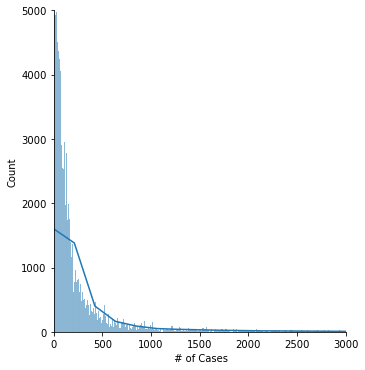

In [6]:
cases= data_counties.iloc[:,5].values # always wearing

plt.figure()
sns.displot(cases,kde=True,fill=True);
plt.xlim([0,3000])
plt.ylim([0,5000])
plt.xlabel(' # of Cases')
plt.ylabel('Count')
plt.show()

In [7]:
# Select rows between two dates using DataFrame.query()
select_date = "2022-10-16"
mask = (data_counties['date'] == select_date)
snapshot = data_counties.loc[mask]
snapshot

,date,county,state,fips,cases,deaths
94454,2022-10-16,Autauga,Alabama,1001.0,18452,228.0
94455,2022-10-16,Baldwin,Alabama,1003.0,65819,715.0
94456,2022-10-16,Barbour,Alabama,1005.0,6910,103.0
94457,2022-10-16,Bibb,Alabama,1007.0,7547,108.0
94458,2022-10-16,Blount,Alabama,1009.0,17256,258.0
...,...,...,...,...,...,...
97705,2022-10-16,Sweetwater,Wyoming,56037.0,12152,131.0
97706,2022-10-16,Teton,Wyoming,56039.0,11771,16.0
97707,2022-10-16,Uinta,Wyoming,56041.0,6163,43.0
97708,2022-10-16,Washakie,Wyoming,56043.0,2668,47.0


Number of data points in current status date snapshot is large and mask_status data contains less fips data. So, below we check which fip is missing.

In [8]:
fips = snapshot['fips'].values
county_fips =mask_data['COUNTYFP'].values
mask_status =[]
fips_selected = []
count = 0
for i in range(len(county_fips)):
    if county_fips[i] not in fips:
        print(county_fips[i],"not in list")
        count=count+1;
print(count)

2060 not in list
2105 not in list
2164 not in list
2282 not in list
36005 not in list
36047 not in list
36061 not in list
36081 not in list
36085 not in list
9


So, we have to drop duplicates based on fips id


In [9]:
df2 =snapshot.drop_duplicates(subset=["fips"], keep='last')
df2

,date,county,state,fips,cases,deaths
94454,2022-10-16,Autauga,Alabama,1001.0,18452,228.0
94455,2022-10-16,Baldwin,Alabama,1003.0,65819,715.0
94456,2022-10-16,Barbour,Alabama,1005.0,6910,103.0
94457,2022-10-16,Bibb,Alabama,1007.0,7547,108.0
94458,2022-10-16,Blount,Alabama,1009.0,17256,258.0
...,...,...,...,...,...,...
97705,2022-10-16,Sweetwater,Wyoming,56037.0,12152,131.0
97706,2022-10-16,Teton,Wyoming,56039.0,11771,16.0
97707,2022-10-16,Uinta,Wyoming,56041.0,6163,43.0
97708,2022-10-16,Washakie,Wyoming,56043.0,2668,47.0


In [10]:
snapshot = snapshot.dropna()
snapshot # now it does not include blanks

fips = snapshot['fips'].values
county_fips =mask_data['COUNTYFP'].values
mask_status =[]
fips_selected = []
mask_status = []
count = 0
idx = []
for i in range(len(fips)):
    if fips[i] in county_fips:
        #print("not in list or nan",fips[i])
        idx.append("Yes");
    else: idx.append("No")

snapshot["idx"]=idx # this shows that data for this county is present in mask_status data
snapshot

C:\Users\alial\AppData\Local\Temp/ipykernel_22808/184909316.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snapshot["idx"]=idx # this shows that data for this county is present in mask_status data


,date,county,state,fips,cases,deaths,idx
94454,2022-10-16,Autauga,Alabama,1001.0,18452,228.0,Yes
94455,2022-10-16,Baldwin,Alabama,1003.0,65819,715.0,Yes
94456,2022-10-16,Barbour,Alabama,1005.0,6910,103.0,Yes
94457,2022-10-16,Bibb,Alabama,1007.0,7547,108.0,Yes
94458,2022-10-16,Blount,Alabama,1009.0,17256,258.0,Yes
...,...,...,...,...,...,...,...
97705,2022-10-16,Sweetwater,Wyoming,56037.0,12152,131.0,Yes
97706,2022-10-16,Teton,Wyoming,56039.0,11771,16.0,Yes
97707,2022-10-16,Uinta,Wyoming,56041.0,6163,43.0,Yes
97708,2022-10-16,Washakie,Wyoming,56043.0,2668,47.0,Yes


In [11]:
snapshot =snapshot.drop_duplicates(subset=["fips"], keep='last')
snapshot

,date,county,state,fips,cases,deaths,idx
94454,2022-10-16,Autauga,Alabama,1001.0,18452,228.0,Yes
94455,2022-10-16,Baldwin,Alabama,1003.0,65819,715.0,Yes
94456,2022-10-16,Barbour,Alabama,1005.0,6910,103.0,Yes
94457,2022-10-16,Bibb,Alabama,1007.0,7547,108.0,Yes
94458,2022-10-16,Blount,Alabama,1009.0,17256,258.0,Yes
...,...,...,...,...,...,...,...
97705,2022-10-16,Sweetwater,Wyoming,56037.0,12152,131.0,Yes
97706,2022-10-16,Teton,Wyoming,56039.0,11771,16.0,Yes
97707,2022-10-16,Uinta,Wyoming,56041.0,6163,43.0,Yes
97708,2022-10-16,Washakie,Wyoming,56043.0,2668,47.0,Yes


In [12]:
mask_data = mask_data.drop_duplicates(subset=['COUNTYFP'], keep='last')
mask_data

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask status
0,1001,0.053,0.074,0.134,0.295,0.444,1
1,1003,0.083,0.059,0.098,0.323,0.436,1
2,1005,0.067,0.121,0.120,0.201,0.491,1
3,1007,0.020,0.034,0.096,0.278,0.572,1
4,1009,0.053,0.114,0.180,0.194,0.459,1
...,...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268,0
3138,56039,0.095,0.157,0.160,0.247,0.340,0
3139,56041,0.098,0.278,0.154,0.207,0.264,0
3140,56043,0.204,0.155,0.069,0.285,0.287,0


In [13]:
i =2

fips = snapshot['fips'].values

fips_county =mask_data['COUNTYFP'].values
mask_county = mask_data['mask status'].values

count=0;
n = len(fips)
mask_status = 2*np.ones(n)
m = len(mask_county)

print(mask_status)
print(mask_status[0])

for j in range(m):

    for i in range(n):
        if fips[j] == fips_county[i]:
            count = count+1;
            mask_status[i]=mask_county[j];
        
print(count)
print(mask_status)

snapshot['Mask Status']=mask_status

[2. 2. 2. ... 2. 2. 2.]
2.0
3133
[1. 1. 1. ... 0. 0. 0.]


In [14]:
# split data between mask and no mask now
maskIDX = (snapshot['Mask Status'] == 1)
no_maskIDX = (snapshot['Mask Status'] == 0)
mask_no = snapshot.loc[no_maskIDX]
mask_yes = snapshot.loc[maskIDX]

In [15]:
mask_no

,date,county,state,fips,cases,deaths,idx,Mask Status
94467,2022-10-16,Clay,Alabama,1027.0,4754,90.0,Yes,0.0
94468,2022-10-16,Cleburne,Alabama,1029.0,4115,71.0,Yes,0.0
94471,2022-10-16,Conecuh,Alabama,1035.0,3350,73.0,Yes,0.0
94472,2022-10-16,Coosa,Alabama,1037.0,3509,62.0,Yes,0.0
94473,2022-10-16,Covington,Alabama,1039.0,10959,250.0,Yes,0.0
...,...,...,...,...,...,...,...,...
97705,2022-10-16,Sweetwater,Wyoming,56037.0,12152,131.0,Yes,0.0
97706,2022-10-16,Teton,Wyoming,56039.0,11771,16.0,Yes,0.0
97707,2022-10-16,Uinta,Wyoming,56041.0,6163,43.0,Yes,0.0
97708,2022-10-16,Washakie,Wyoming,56043.0,2668,47.0,Yes,0.0


In [16]:
mask_yes

,date,county,state,fips,cases,deaths,idx,Mask Status
94454,2022-10-16,Autauga,Alabama,1001.0,18452,228.0,Yes,1.0
94455,2022-10-16,Baldwin,Alabama,1003.0,65819,715.0,Yes,1.0
94456,2022-10-16,Barbour,Alabama,1005.0,6910,103.0,Yes,1.0
94457,2022-10-16,Bibb,Alabama,1007.0,7547,108.0,Yes,1.0
94458,2022-10-16,Blount,Alabama,1009.0,17256,258.0,Yes,1.0
...,...,...,...,...,...,...,...,...
97690,2022-10-16,Carbon,Wyoming,56007.0,4931,55.0,Yes,1.0
97692,2022-10-16,Crook,Wyoming,56011.0,1508,30.0,Yes,1.0
97693,2022-10-16,Fremont,Wyoming,56013.0,16058,200.0,Yes,1.0
97697,2022-10-16,Laramie,Wyoming,56021.0,30161,307.0,Yes,1.0


So, we have sufficient data for both mask and no mask cases. Now, we will apply 2 sample t-test and test hypothesis that both data comes from same population that will be Null hypothesis. Alternate hypothesis is there is not significant evidence that both comes from same population. If alternate hypothesis is valid, then we can say that wearing mask can affect the infection.

In [17]:
cases_no_mask = mask_no['cases'].values
cases_mask = mask_yes['cases'].values

print(cases_no_mask.mean())
print(cases_mask.mean())

print(cases_no_mask.std())
print(cases_mask.std())

17117.505350772888
33786.096858638746
63894.256450040004
111709.84949429755


Text(6.799999999999997, 0.5, 'Density')

<Figure size 432x288 with 0 Axes>

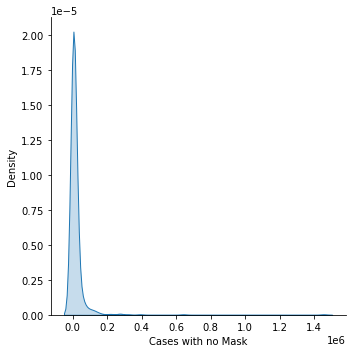

<Figure size 432x288 with 0 Axes>

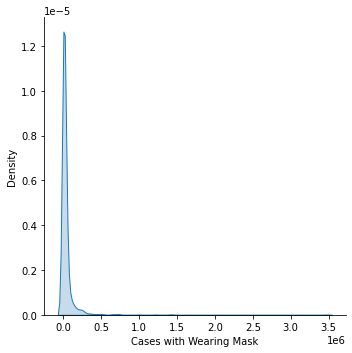

In [18]:
plt.figure()
sns.displot(cases_no_mask,kind="kde",fill=True);
plt.xlabel('Cases with no Mask')
plt.ylabel('Density')

plt.figure()
sns.displot(cases_mask,kind="kde",fill=True);
plt.xlabel('Cases with Wearing Mask')
plt.ylabel('Density')

## Vaccination Status of a county
For vaccine and not vaccinated, we have to take data before all vaccinated and after all vaccinated.

In [19]:
# reading data into 
data = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us-counties-2020.csv')
data # shows status of no vaccine

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0


In [20]:
# Select rows between two dates using DataFrame.query()
select_date = "2020-12-30"
idx = (data['date'] == select_date)
snapshot = data.loc[idx]
snapshot

,date,county,state,fips,cases,deaths
878247,2020-12-30,Autauga,Alabama,1001.0,4164,48.0
878248,2020-12-30,Baldwin,Alabama,1003.0,13392,160.0
878249,2020-12-30,Barbour,Alabama,1005.0,1492,32.0
878250,2020-12-30,Bibb,Alabama,1007.0,1817,46.0
878251,2020-12-30,Blount,Alabama,1009.0,4584,63.0
...,...,...,...,...,...,...
881487,2020-12-30,Sweetwater,Wyoming,56037.0,2943,15.0
881488,2020-12-30,Teton,Wyoming,56039.0,2121,3.0
881489,2020-12-30,Uinta,Wyoming,56041.0,1540,7.0
881490,2020-12-30,Washakie,Wyoming,56043.0,767,16.0


<Figure size 432x288 with 0 Axes>

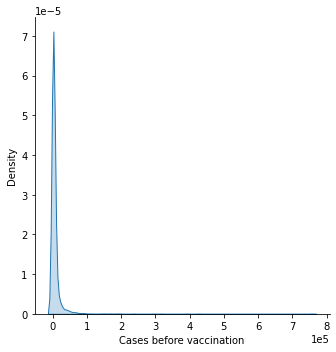

In [21]:
plt.figure()
sns.displot(snapshot['cases'],kind="kde",fill=True);
plt.xlabel('Cases before vaccination')
plt.ylabel('Density')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

In [22]:
# reading data into 
data = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us-counties-2021.csv')
data # shows status of no vaccine

,date,county,state,fips,cases,deaths
0,2021-01-01,Autauga,Alabama,1001.0,4239,50.0
1,2021-01-01,Baldwin,Alabama,1003.0,13823,169.0
2,2021-01-01,Barbour,Alabama,1005.0,1517,33.0
3,2021-01-01,Bibb,Alabama,1007.0,1854,46.0
4,2021-01-01,Blount,Alabama,1009.0,4693,63.0
...,...,...,...,...,...,...
1185368,2021-12-31,Sweetwater,Wyoming,56037.0,8320,107.0
1185369,2021-12-31,Teton,Wyoming,56039.0,5950,14.0
1185370,2021-12-31,Uinta,Wyoming,56041.0,4154,31.0
1185371,2021-12-31,Washakie,Wyoming,56043.0,1879,37.0


In [23]:
# Select rows between two dates using DataFrame.query()
select_date = "2021-12-30"
idx = (data['date'] == select_date)
snapshot = data.loc[idx]
snapshot

,date,county,state,fips,cases,deaths
1178872,2021-12-30,Autauga,Alabama,1001.0,10953,160.0
1178873,2021-12-30,Baldwin,Alabama,1003.0,39583,593.0
1178874,2021-12-30,Barbour,Alabama,1005.0,3819,81.0
1178875,2021-12-30,Bibb,Alabama,1007.0,4514,95.0
1178876,2021-12-30,Blount,Alabama,1009.0,11193,198.0
...,...,...,...,...,...,...
1182117,2021-12-30,Sweetwater,Wyoming,56037.0,8320,107.0
1182118,2021-12-30,Teton,Wyoming,56039.0,5950,14.0
1182119,2021-12-30,Uinta,Wyoming,56041.0,4154,31.0
1182120,2021-12-30,Washakie,Wyoming,56043.0,1879,37.0


<Figure size 432x288 with 0 Axes>

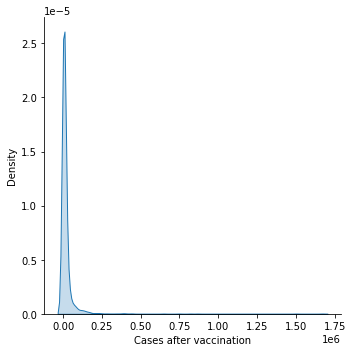

In [24]:
plt.figure()
sns.displot(snapshot['cases'],kind="kde",fill=True);
plt.xlabel('Cases after vaccination')
plt.ylabel('Density')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

## Statewide vaccination status per hundered

In [25]:
# reading data into 
data = pd.read_csv(r'C:\Users\alial\Desktop\Chem Math New\Project 1\us_state_vaccinations.csv')
data # shows status of no vaccine

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2022-10-08,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871.0,1505.0,NaN,NaN,NaN
41184,2022-10-09,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871.0,1505.0,NaN,NaN,NaN
41185,2022-10-10,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871.0,1505.0,NaN,NaN,NaN
41186,2022-10-11,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871.0,1505.0,NaN,NaN,NaN


In [26]:
# Select rows between two dates using DataFrame.query()
select_date = "2021-01-14"
idx = (data['date'] == select_date)
snapshot = data.loc[idx]
snapshot

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
641,2021-01-14,Alaska,42596.0,150450.0,35508.0,NaN,5.82,NaN,4.85,20.57,3916.0,3379.0,4619.0,0.283,NaN,NaN
1280,2021-01-14,American Samoa,2971.0,10650.0,2409.0,NaN,5.33,NaN,4.33,19.12,394.0,424.0,7614.0,0.279,NaN,NaN
1919,2021-01-14,Arizona,173665.0,570625.0,157397.0,NaN,2.39,NaN,2.16,7.84,18920.0,16155.0,2219.0,0.304,NaN,NaN
2558,2021-01-14,Arkansas,108316.0,297800.0,90339.0,NaN,3.59,NaN,2.99,9.87,13462.0,33718.0,11173.0,0.364,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37995,2021-01-14,Virginia,217836.0,852725.0,192918.0,NaN,2.55,NaN,2.26,9.99,0.0,13614.0,1595.0,0.255,NaN,NaN
38634,2021-01-14,Washington,225238.0,655575.0,187450.0,NaN,2.96,NaN,2.46,8.61,17000.0,14836.0,1948.0,0.344,NaN,NaN
39273,2021-01-14,West Virginia,118660.0,160975.0,99061.0,NaN,6.62,NaN,5.53,8.98,7951.0,7665.0,4277.0,0.737,NaN,NaN
39912,2021-01-14,Wisconsin,149955.0,437900.0,135841.0,NaN,2.58,NaN,2.33,7.52,12702.0,6351.0,1091.0,0.342,NaN,NaN


<Figure size 432x288 with 0 Axes>

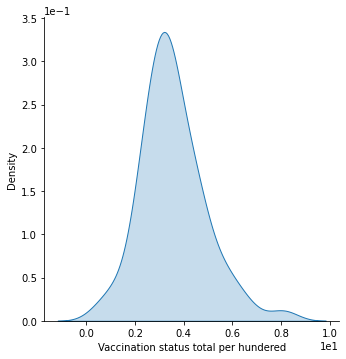

In [27]:
plt.figure()
sns.displot(snapshot['total_vaccinations_per_hundred'],kind="kde",fill=True);
plt.xlabel('Vaccination status total per hundered')
plt.ylabel('Density')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

### Application of 2 sample t-test on Face Mask Status 
The data sets of mask_no and mask_yes are going to be utilized.
From standard deviation of each data set, it has been found that there is unequal variance in both data set. So, we apply 2 sample t-test to check whether data set of mask_yes comes from the same population that is mask_no data set or not. Data sets have differnt number of data points.

**Null Hypothesis:**       $  H_0$ : $ \mu_1 = \mu_2$  

**Alternate Hypothesis:**  $  H_1$ : $ \mu_1 > \mu_2$

**Test statistics :**

$$ t = \frac{\bar x_1  - \bar x_2 }{\sigma_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$


In [28]:
from scipy import stats
#cases_no_mask = mask_no['cases'].values
#cases_mask = mask_yes['cases'].values

print(cases_no_mask.mean())
print(cases_mask.mean())

print(cases_no_mask.std())
print(cases_mask.std())

17117.505350772888
33786.096858638746
63894.256450040004
111709.84949429755


In [30]:
t2 = stats.ttest_ind(cases_mask,cases_no_mask,equal_var=False)
t2

Ttest_indResult(statistic=5.191952796437996, pvalue=2.2427477895220136e-07)

From p-value, we cannot reject null hypothesis. There is no difference between the two samples.